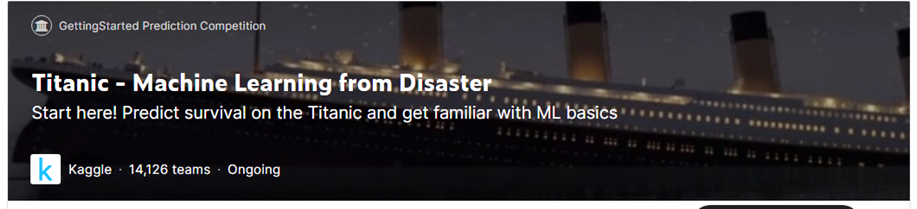

 https://www.kaggle.com/c/titanic

In [ ]:
# Importar as bibliotecas

import pandas as pd
import numpy as np
import seaborn as sb
import matplotlib.pyplot as plt
%matplotlib inline

      

from sklearn.linear_model import LogisticRegression 
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier,export_graphviz
from sklearn import preprocessing
from sklearn import metrics 
from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix 
from sklearn.metrics import roc_curve


import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import roc_auc_score, roc_curve, classification_report,\
                            accuracy_score, confusion_matrix, auc


#### Abaixo estão as descrições das colunas do  Dataset Titanic:
    . passengerid = ID do passageiro do navio (código primário).
    . survived = Se sobreviveu ao naufrágio estará como 1 e caso esteja com 0 (zero) não sobreviveu.
    . pclass = Tipo de classe de passagem (Do 1 ao 3), (1 = 1st, 2 = 2nd, 3 = 3rd).
    . name = Nome do passageiro
    . sex = Gênero do passageiro, sendo masculino e feminino.
    . age = Idade do passageiro na data da ocorrência do naufrágio.
    . sibsp = Número de irmãos / cônjuges a bordo.
    . parch = Número de pais / filhos a bordo.
    . ticket = Código do ticket.
    . fare = Valor da passagem.
    . cabin = Código de identificação da Cabine.
    . embarked = Local ondem o passageiro embarcou no navio: C = Cherbourg, Q = Queenstown, S = Southampton)

In [ ]:
# Importando de um repositório no github e as primeiras observações
titanic = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/train.csv')
titanic.head()

In [ ]:
# Conteúdo da base
titanic.info()

In [ ]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(titanic.isnull().sum(), titanic.isnull().sum()/len(titanic)), columns=['Count', 'Proportion'], index=titanic.columns)


In [ ]:
# Uma variável é a variável target: "Suvived" : Quantos sobreviveram e não sobreviveram
(titanic.Survived.value_counts() / titanic.shape[0]) * 100

In [ ]:
# Descritivo: variáveis quantitativas
titanic.describe().T

In [ ]:
def freq(x: pd.Series, plot=False):
    contagem = x.value_counts()
    percentual = round((x.value_counts() / x.shape[0]) * 100, 3)
    res = pd.DataFrame({'values': x.unique(), 'n': contagem, 'perc': percentual})
    if plot:
        sb.countplot(x)
        plt.show()
    return res

In [ ]:
# Como estamos trabalhando com uma amostra ==> Avaliar em percentual
freq(titanic.Survived, plot=True)

In [ ]:

# Importando de um repositório no github e as primeiras observações da base test

titanic_test = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv')
titanic_test.head()


In [ ]:
# Verificando as colunas do dataset de teste
titanic_test.info()

# Iniciando o pré processamento 

### A Análise Exploratória deve seguir a metodologia sempre focada no objetivo do estudo

### PROCESSO KDD -  KNOWLEDGE DISCOVERY IN DATABASES
Fonte: Processo de KDD. Adaptado de Fayyad et al. (1996a).
 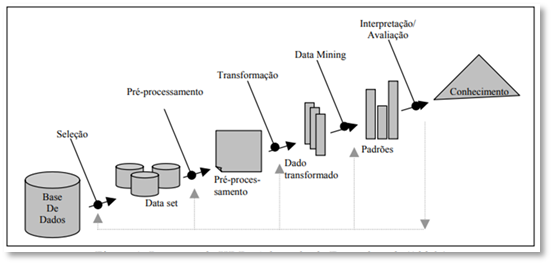

### As análises a seguir sempre usaremos a variável target"Survived"
#### Variáveis preditoras quantitativas e Variáveis categóricas 

In [ ]:
# Variável Fare
sb.boxplot(x='Survived', y='Fare', data=titanic)
plt.title('Distribuição de Fare por Survived')
plt.show()

In [ ]:
# Variável Fare
sb.boxplot(x='Pclass', y='Fare', data=titanic)
plt.title('Distribuição de Fare por Classe')
plt.show()

In [ ]:
# Variável Idade
sb.boxplot(x='Survived', y='Age', data=titanic)
plt.title('Distribuição de Age por Survived')
plt.show()

In [ ]:
# Age é uma variável que tem um pergentual grande de missing´s

In [ ]:
Age_median = titanic['Age'].median()


Age_median

# Possibilidade 1: Se ok! é só trocar missing pela mediana titanic['Age'].fillna(Age_median,inplace=True)

In [ ]:
# Possibilidade 2: Avaliar Idade por sexo - Graficamente
sb.boxplot(x='Sex', y='Age', data=titanic)
plt.title('Distribuição de idade por sexo')
plt.show()

In [ ]:
# Calculando idade mediana por sexo
C_median= titanic['Age'].groupby(by=titanic.Sex).median()

# exibindo
C_median

In [ ]:
# Possibilidade: Estimando a idade média por várias outras variáveis

sb.boxplot(x='Pclass', y='Age', data=titanic, palette='hls')

In [ ]:
# Possibilidade: Estimando a idade média por várias outras variáveis

trainMeans = titanic.groupby(['Pclass', 'Sex'])['Age'].mean()

trainMeans


In [ ]:
# aplicando as médias
def f(x):
    if not np.isnan(x["Age"]):  # not NaN
        return x["Age"]
    return trainMeans[x["Pclass"], x["Sex"]]

titanic['Age'] = titanic.apply(f, axis=1)



Uma forma de estimar utilizando idade com base em modelo: Y= Age e X demais variáveis como sexo, pclass, embarked...
from sklearn.tree import DecisionTreeRegressor
regr = DecisionTreeRegressor(max_depth=5)
regr.fit(X, y)
y_pred = regr.predict(X_test)
DecisionTreeRegressor(criterion='mse', max_depth=5, max_features=None,
           max_leaf_nodes=None, min_impurity_decrease=0.0,
           min_impurity_split=None, min_samples_leaf=1,
           min_samples_split=2, min_weight_fraction_leaf=0.0,
           presort=False, random_state=None, splitter='best')

In [ ]:
titanic.describe().T

In [ ]:
# Variáveis Preditoras Qualitativas
# Sexo
titanic.groupby('Survived')['Sex'].value_counts().unstack(0).plot.bar();

In [ ]:
# Converting categorical variables to a dummy indicators
titanic['male'] = pd.get_dummies(titanic['Sex'],drop_first=True)
titanic.head()


In [ ]:
# Variável Porto de embarque
titanic.groupby('Survived')['Embarked'].value_counts().unstack(0).plot.bar()

In [ ]:
# Converting categorical variables to a dummy indicators

# dummies variable para Embarked
embarked_dummies = pd.get_dummies(titanic['Embarked'], prefix='Embarked')
titanic = pd.concat([titanic, embarked_dummies], axis=1)
titanic.head()


In [ ]:
# percebam que aqui estamos excluindo a variável categórica
titanic.drop(['Embarked'], axis=1, inplace=True)
display(titanic.head())


In [ ]:
# Variável Classe do Bilhete

# Transforma classe em categorica
titanic['Pclass'] = titanic['Pclass'].astype('category')

In [ ]:
titanic.groupby('Survived')['Pclass'].value_counts().unstack(0).plot.bar()

In [ ]:
# dummies variable para pclass

Pclass_dummies = pd.get_dummies(titanic['Pclass'], prefix='Pclass')
titanic = pd.concat([titanic, Pclass_dummies], axis=1)

# titanic.drop(['Pclass'], axis=1, inplace=True)

display(titanic.head())



In [ ]:
pd.DataFrame(zip(titanic.isnull().sum(), titanic.isnull().sum()/len(titanic)), columns=['Count', 'Proportion'], index=titanic.columns)


In [ ]:
titanic.info()

In [ ]:
titanic.describe().T

In [ ]:

# Fazer uma cópia do arquivo titanic e apagar as variáveis não utilizadas no modelo
titanic_copy  = titanic.copy()

titanic_copy= titanic_copy.drop(['PassengerId', 'Name', 'Sex','Ticket', 'Cabin'], axis=1)
titanic_copy.info()

In [ ]:
# Pre-processing
# Mudar o formato da variável quantitativa em qualitativa
# titanic_copy['Survived']= titanic_copy['Survived'].astype(str)

In [ ]:
titanic_copy.describe().T

In [ ]:
# Agora dividir em treino e teste (teste com XX%)


# Dividindo os dados em treino e teste:
#X_train, X_test, y_train, y_test = train_test_split(titanic_copy.drop('Survived',axis=1),titanic_copy['Survived'],test_size=0.01, random_state=17)

X_train, X_test, y_train, y_test = train_test_split(titanic_copy.drop('Survived',axis=1),titanic_copy['Survived'],test_size=0.10, random_state=17)


#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = .3, random_state=25)

X_train.shape, X_test.shape

In [ ]:
X_train

In [ ]:
y_train

### Primeiro modelo de Classificação Árvore de Decisão

https://scikit-learn.org/stable/modules/tree.html

In [ ]:

    
Classif_tree = DecisionTreeClassifier()



In [ ]:
# Treinando com DecisionTree

classif = Classif_tree.fit(X_train, y_train)

# Como treinamos a árvore sem especificar nenhum parâmetro, 
# ela cresceu de forma indefinida e ficou grande demais impossibilitando a visualização da mesma.

In [ ]:
# Verificando as features mais importantes para o modelo treinado:
classif.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

In [ ]:
# Mostrando as imporrtâncias das variávei spreditoras com seus respectivos nomes.

for feature,importancia in zip(X_train.columns,classif.feature_importances_):
    print("{}:{}".format(feature, importancia))

In [ ]:
# Testando o modelo
y_pred_all = classif.predict(X_train)

In [ ]:
y_pred_all

### Matriz de Confusão



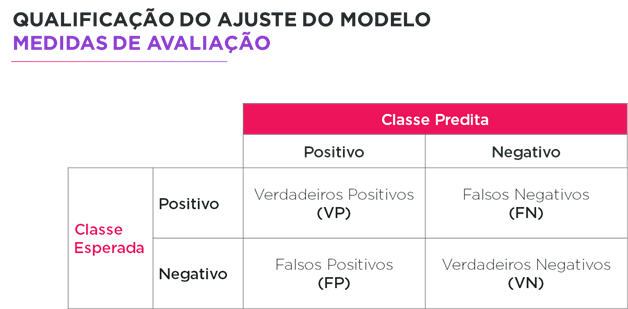

    # https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html
    
    # Resultado do classification_report:
    # Precision score = VP/(FP+VP)
    # Recall score = VP/(FN+VP)
    # F1 Score = 2* Precision Score * Recall Score/ (Precision Score + Recall Score)
        # F1 Score pode ser interpretado como uma média harmônica entre Precision e Recall Score 
        # F1 Score apresenta melhor resultado quando o valor é 1 e pior escore em 0.

In [ ]:
from sklearn.metrics import confusion_matrix


# Matriz de Confusão

confusion_matrix = confusion_matrix(y_train, y_pred_all)
confusion_matrix


In [ ]:
##### verificando um acerto médio com cv validadção cruzada

from sklearn.model_selection import cross_val_predict
from sklearn.model_selection import cross_val_score

scores_dt = cross_val_score(classif, X_train, y_train, scoring='accuracy', cv=5)
print("DecisionTree score: {}".format(scores_dt.mean()))


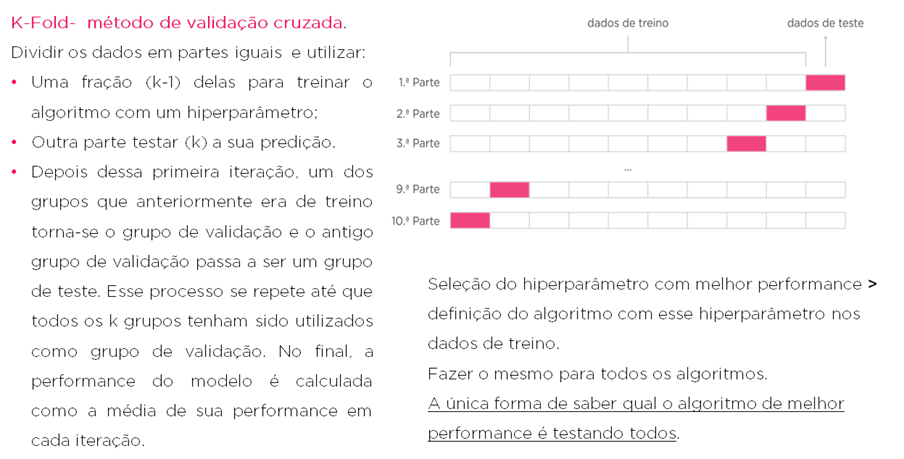

In [ ]:
print(classification_report(y_train, y_pred_all))



In [ ]:
# colocando criterios para árvore

clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

clf.fit(X_train, y_train)

In [ ]:
# colocando criterios para árvore

clf = DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=4,
            max_features='auto', max_leaf_nodes=None,
            min_impurity_decrease=0.0,  
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0,
            random_state=0, splitter='best')

clf.fit(X_train, y_train)

In [ ]:
# Verificando as features mais importantes para o modelo treinado:
clf.feature_importances_

# O código acima nos retorna um array com o valor de cada variável:

In [ ]:
# Testando o modelo
y_pred = clf.predict(X_test)

In [ ]:
# Mostrando as importâncias das variáveis preditoras com seus respectivos nomes.

for feature,importancia in zip(X_test.columns,clf.feature_importances_):
    print("{}:{}".format(feature, importancia))

In [ ]:
# Matriz de Confusão
from sklearn.metrics import confusion_matrix 
confusion_matrix = confusion_matrix(y_test, y_pred)
confusion_matrix

In [ ]:
print(classification_report(y_test, y_pred))



In [ ]:
from sklearn.tree import plot_tree
import matplotlib.pyplot as plt
fig = plt.figure(figsize=(30,12))
a = plot_tree(clf, feature_names=X_train.columns, fontsize=10,
filled=True,
class_names=['Survived(não)', 'Survived(sim)'])

In [ ]:
# colocando a variável target como numérica novamente

titanic_copy['Survived']= titanic_copy['Survived'].astype(int)

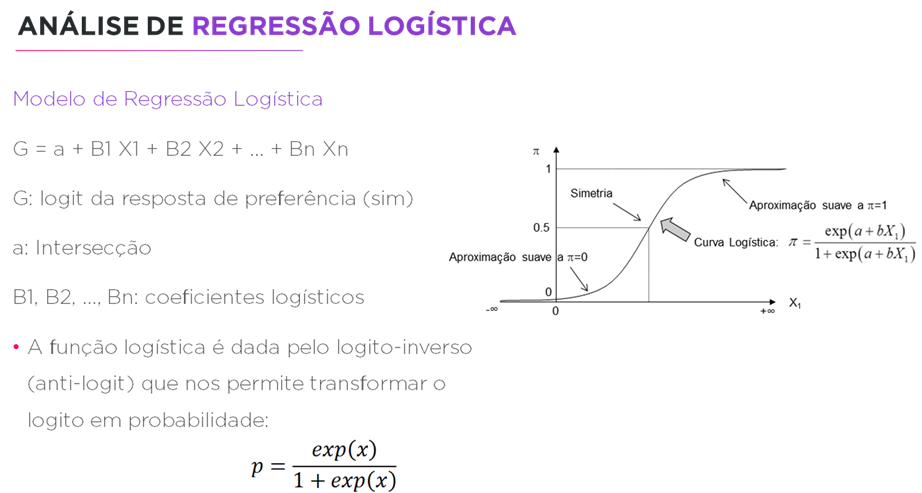

In [ ]:
# Modelo de Regressão Logística

modelo = smf.glm(formula='Survived ~ Age + Pclass_1 + Pclass_2 + Pclass_3 + male', data=titanic,
             family = sm.families.Binomial()).fit()
print(modelo.summary())

#### Segundo Modelo de Classificação Regressão Logística
#### investigar as chances de sobrevivência das pessoas dados 3 preditores:
        idade da pessoa;
        classe em que a pessoa viajava e
        sexo da pessoa.

In [ ]:
titanic.info()

In [ ]:
# Utilizando as variáveis preditoras numéricas e categóricas
modelo = smf.glm(formula='Survived ~ Age + Pclass + Sex', data=titanic,
               family = sm.families.Binomial()).fit()
print(modelo.summary())


Agora, vamos interpretar os resultados do modelo. Os logits estimados só podem ser interpretados em termos de aumento ou diminuição de chances de sobrevivência já que estão em escala logarítmica. Todos os coeficientes estimados foram estatisticamente significativos (p-valor abaixo de 0.05 adotando 95% de confiança).

Pessoas que viajavam na segunda classe possuem menos chances de sobrevivência do que quem viajava na primeira. Quem viajava na terceira classe possui menos chances ainda. Homens possuem menos chances de sobrevivência do que mulheres. Quanto mais velho, menores as chances de sobrevivência. Estas são as intuições gerais do modelo.

Para obtermos coeficientes mais interpretáveis, precisamos fazer uma transformação. Utilizando $e^\beta$ obtemos as chances relativas.

In [ ]:
print(np.exp(modelo.params[1:]))

    ### Pessoas que viajavam na segunda classe tinham 0.30 das chances de sobrevivência que as pessoas da primeira classe tinham. Pessoas da terceira classe tinham 0.076 das chances que as pessoas da primeira classe tinham. Homens tinham 0.08 das chances das mulheres.

    Para cada ano a mais de sobrevivência o indivíduo fica com 0.96 das chances de outro indivíduo com um ano a menos.

    Podemos também gerar os mesmos dados em percentuais relativos de chances para compará-los e obter uma interpretação parecida com a interpretação da regressão linear, mas em termos de chances.

In [ ]:
(np.exp(modelo.params[1:]) - 1) * 100

    Agora ficou fácil. Pessoas da segunda classe tem 73% menos chances de sobrevivência do que pessoas da primeira classe. Pessoas da terceira classe tem 92% menos chances de sobrevivência que pessoas da primeira classe. Homens tem 92% menos chances de sobrevivência do que mulheres.

    Para cada ano a mais de idade, as chances diminuem 3.68%.

    Agora vamos refazer o modelo utilizando scikit-learn para maior facilidade de obter as métricas de ajuste.

In [ ]:
# Agora vamos fazer com sklearn para aproveitar as métricas
# https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html
# class sklearn.linear_model.LogisticRegression(penalty='l2', *,
# dual=False, tol=0.0001, C=1.0, fit_intercept=True, intercept_scaling=1, class_weight=None, 
#random_state=None, solver='lbfgs', max_iter=100, multi_class='auto', verbose=0, warm_start=False, n_jobs=None,
# l1_ratio=None)[source]


model = LogisticRegression(penalty='none', solver='newton-cg')
baseline_df = titanic[['Survived', 'Pclass', 'Sex', 'Age']].dropna()
y = baseline_df.Survived
X = pd.get_dummies(baseline_df[['Pclass', 'Sex', 'Age']], drop_first=True)
print(X)

In [ ]:
model.fit(X, y)

In [ ]:
LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='warn', n_jobs=None, penalty='none',
                   random_state=None, solver='newton-cg', tol=0.0001, verbose=0,
                   warm_start=False)

In [ ]:
print(model.coef_) # Temos o mesmo modelo!

In [ ]:
# Predizendo as probabilidades
yhat = model.predict_proba(X)

In [ ]:
yhat

In [ ]:
# Vejam que para cada indivíduo temos a Probabilidade de Não Sobreviver e Probabilidade de Sobreviver


yhat = yhat[:, 1] # manter somente para a classe positiva

In [ ]:
### Vejamos a matriz de confusão do modelo que estimamos:
 
from sklearn.metrics import confusion_matrix 
confusion_matrix(y, model.predict(X)) # usando a função do sklearn

In [ ]:
pd.crosstab(y, model.predict(X))  # fazendo "na mão"

In [ ]:
acuracia = accuracy_score(y, model.predict(X))
print('O modelo obteve %0.4f de acurácia.' % acuracia)

A acurácia não é uma medida muito boa para trabalhar com modelos de classificação pois ela pode nos induzir a achar que um modelo que prediz corretamente todos os zeros mas nenhum um é um modelo muito bom. Vejamos outras alternativas de métricas mais interessantes do que a acurácia.

In [ ]:
print(classification_report(y, model.predict(X)))

O classification report do SciKit-Learn nos provê as três métricas de avaliação apresentadas na figura acima.

Precision é a capacidade do modelo de não prever uma instância negativa como positiva (não cometer erro do tipo 1). Para todas as instância classificadas como positivas, qual é o percentual de acerto.

Recall é a capacidade do modelo de encontrar todas as instâncias positivas. Para todas as instâncias que são de fato positivas, qual é o percentual de acerto.

A métrica F1 conjuga as duas anteriores como uma média harmônica entre ambas. Ela deve sempre ser priorizada para comparar modelos de classificação em relação à acurácia.

Uma excelente alternativa é fazer a curva ROC e calcular o AUC (área debaixo da curva).

A curva ROC (Receiver Operating Characteristic Curve) leva em conta a TPR (True Positive Rate ou Recall ou Sensitity) e a FPR (False Positive Rate ou Specificity).

A curva ROC traça esses dois parâmetros. o AUC (Area Under the Curve) é um valor que sintetiza a informação da curva ROC. Ela varia de 0.5 a 1. Em suma, essa métrica nos diz o quanto o modelo é capaz de distinguir as duas classes. Vejamos o AUC e a curva RUC para o modelo que estimamos.

In [ ]:
print('AUC: %0.2f' % roc_auc_score(y, yhat))

In [ ]:
def plot_roc_curve(y_true, y_score, figsize=(10,6)):
    fpr, tpr, _ = roc_curve(y_true, y_score)
    plt.figure(figsize=figsize)
    auc_value = roc_auc_score(y_true, y_score)
    plt.plot(fpr, tpr, color='orange', label='ROC curve (area = %0.2f)' % auc_value)
    plt.plot([0, 1], [0, 1], color='darkblue', linestyle='--')
    plt.xlabel('False Positive Rate')
    plt.ylabel('True Positive Rate')
    plt.title('Receiver Operating Characteristic (ROC) Curve')
    plt.legend()
    plt.show()


In [ ]:
plot_roc_curve(y, yhat)

Podemos considerar uma área debaixo da curva de mais de 0.7 como aceitável. Mais de 0.8 parece bom. Mais de .9 está excelente. Há também outras métricas que podemos explorar.

Agora vamos fazer predições com nosso modelo? Vamos prever/simular a  probabilidade de sobrevivência no Titanic  Para fazer predições, é importante entrar os dados no modelo com o mesmo formato usado para treino.

In [ ]:
eu = pd.DataFrame({'Age':30, 'Pclass_2':0, 'Pclass_3':0, 'Sex_male':0}, index=[0])
minha_prob = model.predict_proba(eu)
print('Eu teria {}% de probabilidade de sobrevivência se estivesse no Titanic'\
      .format(round(minha_prob[:,1][0]*100, 2)))

In [ ]:
# Importando de um repositório no github
prova = pd.read_csv('https://raw.githubusercontent.com/agconti/kaggle-titanic/master/data/test.csv')
prova.head()

In [ ]:
# Avaliando a quantidade de NA´s (missing)
pd.DataFrame(zip(prova.isnull().sum(), prova.isnull().sum()/len(prova)), columns=['Count', 'Proportion'], index=prova.columns)


In [ ]:
# aplicando as médias calculadas na base treino
def f(x):
    if not np.isnan(x["Age"]):  # not NaN
        return x["Age"]
    return trainMeans[x["Pclass"], x["Sex"]]

prova['Age'] = prova.apply(f, axis=1)



In [ ]:
# Transforma classe em categorico
prova['Pclass'] = prova['Pclass'].astype('category')

# Converting categorical variables to a dummy indicators

Pclass_dummies = pd.get_dummies(prova['Pclass'], prefix='Pclass')
prova = pd.concat([prova, Pclass_dummies], axis=1)
prova.drop(['Pclass'], axis=1, inplace=True)

Sex_dummies = pd.get_dummies(prova['Sex'], prefix='Sex')
prova = pd.concat([prova,Sex_dummies], axis=1)
prova.drop(['Sex'], axis=1, inplace=True)

display(prova.head())


In [ ]:
prova.info()

In [ ]:
prova.describe()


In [ ]:
# Selecionar as variáveis

var_prova = prova.iloc[:,[2,10,11,12]].values
var_prova

In [ ]:
# Predizendo as probabilidades
yhat_teste = model.predict_proba(var_prova) #prediction
yhat_teste

In [ ]:
yhat_teste = yhat_teste[:, 1] # manter somente para a classe positiva

In [ ]:
X_train

### Random Forest

In [ ]:
# Documentação https://scikit-learn.org/stable/modules/generated/sklearn.ensemble.RandomForestClassifier.html
from sklearn.ensemble import RandomForestClassifier

random_forest = RandomForestClassifier(n_estimators=5, max_depth=4, n_jobs=-1)
random_forest.fit(X_train, y_train)



In [ ]:
y_predito = random_forest.predict(X_test)
accuracy_score(y_test, y_predito)

In [ ]:
for caracteristica, score in zip(X_train.columns, random_forest.feature_importances_):
  print('caracteristica {} e seu score {}'.format(caracteristica, score))